In [2]:
import pandas as pd

# Data Cleaning

In [3]:
#import data
df = pd.read_csv('Data/All_Cities_Combined.csv')

/var/folders/vp/y35h7cns1893095_3t9y959w0000gn/T/ipykernel_19919/795049341.py:1: DtypeWarning: Columns (4,5,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/All_Cities_Combined.csv')


In [ ]:
df.info()

In [ ]:
df.head()

#### Removing columns

In [6]:
# Drop the columns that are not needed
df = df.drop(columns=['host_name', 'last_review', 'license', 'id', 'neighbourhood_group', 'name'])

#### Null Values

In [7]:
#check for missing values
df.isnull().sum()

host_id                                0
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                             134813
minimum_nights                         0
number_of_reviews                      0
reviews_per_month                 235615
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
year                                   0
month                                  0
city                                   0
state                                  0
dtype: int64

In [8]:
df.isnull().sum()

host_id                                0
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                             134813
minimum_nights                         0
number_of_reviews                      0
reviews_per_month                 235615
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
year                                   0
month                                  0
city                                   0
state                                  0
dtype: int64

In [10]:
#replace missing values for reviews_per_month with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


In [11]:
df['price'].describe()

count    804574.000000
mean        242.925849
std         914.368992
min           0.000000
25%          88.000000
50%         140.000000
75%         237.000000
max      100000.000000
Name: price, dtype: float64

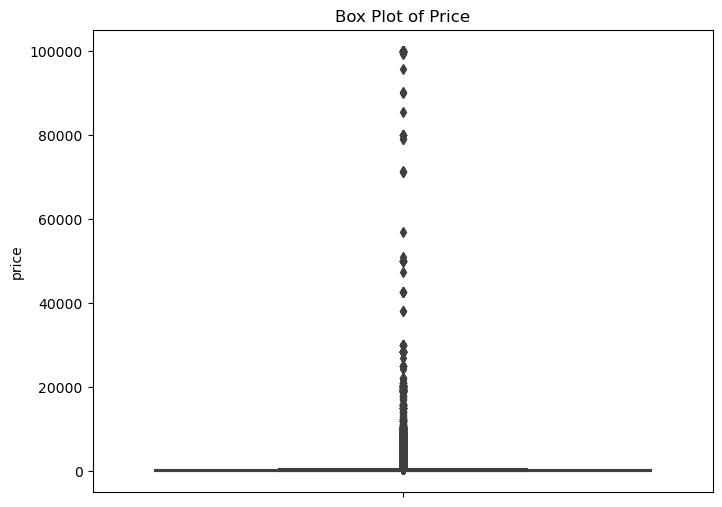

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame and 'price' is your column of interest

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['price'])
plt.title('Box Plot of Price')
plt.show()




- Skewed Data: The box plot indicates that the price distribution is heavily skewed with extreme outliers. This suggests that using the mean for imputation might not be appropriate, as it would likely be pulled toward these high values, resulting in overestimation.

- Long Tail: The presence of a long tail in the distribution implies that a significant portion of the data might consist of more typical, lower-priced values.

In [13]:
price_median = df['price'].median()
df['price'].fillna(price_median, inplace=True)

In [14]:
df['price'].describe()

count    939387.000000
mean        228.154788
std         846.986876
min           0.000000
25%          96.000000
50%         140.000000
75%         210.000000
max      100000.000000
Name: price, dtype: float64

In [15]:
#checking for duplicates
df.duplicated().sum()

3034

# General EDA

### Univariate Analysis

In [16]:
df

host_id  neighbourhood   latitude   longitude        room_type  \
0            8028          78702  30.260570  -97.734410  Entire home/apt   
1            8186          78729  30.456970  -97.784220     Private room   
2           13879          78704  30.248850  -97.735870  Entire home/apt   
3           14156          78704  30.260340  -97.764870  Entire home/apt   
4           25298          78741  30.234660  -97.736820  Entire home/apt   
...           ...            ...        ...         ...              ...   
939382  398317720  Phinney Ridge  47.676760 -122.358820  Entire home/apt   
939383  184675574         Bryant  47.665714 -122.289243     Private room   
939384  584875397        Roxhill  47.531331 -122.374214  Entire home/apt   
939385  581629893  Rainier Beach  47.509680 -122.256950     Private room   
939386  386420269       Belltown  47.614920 -122.347120  Entire home/apt   

        price  minimum_nights  number_of_reviews  reviews_per_month  \
0       126.0               2                657               3.72   
1        45.0               1                290               1.77   
2        57.0              30                122               0.73   
3       159.0               3                305               2.09   
4        48.0               4                 51               0.31   
...       ...             ...                ...                ...   
939382  481.0               1                  0               0.00   
939383   82.0               2                  0               0.00   
939384  222.0               2                  0               0.00   
939385   40.0               1                  0               0.00   
939386  432.0               2                  0               0.00   

        calculated_host_listings_count  availability_365  \
0                                    1               306   
1                                    1                 0   
2                                    1                 0   
3                                    1               156   
4                                    1                98   
...                                ...               ...   
939382                              66               324   
939383                               4                26   
939384                               1               171   
939385                               1               260   
939386                              30               152   

        number_of_reviews_ltm  year      month     city       state  
0                          42  2023  September   Austin       Texas  
1                          21  2023  September   Austin       Texas  
2                           3  2023  September   Austin       Texas  
3                          17  2023  September   Austin       Texas  
4                           3  2023  September   Austin       Texas  
...                       ...   ...        ...      ...         ...  
939382                      0  2024       June  Seattle  Washington  
939383                      0  2024       June  Seattle  Washington  
939384                      0  2024       June  Seattle  Washington  
939385                      0  2024       June  Seattle  Washington  
939386                      0  2024       June  Seattle  Washington  

[939387 rows x 16 columns]

#### Price

Measures of Central Tendency:
- Mean: The average value of the variable.
- Median: The middle value when the data is ordered.
- Mode: The most frequently occurring value.
Measures of Dispersion:
- Range: The difference between the maximum and minimum values.
- Variance: The average of the squared differences from the mean.
- Standard Deviation: The square root of the variance, representing the average amount of variability in the data.
- Interquartile Range (IQR): The range between the first quartile (Q1) and third quartile (Q3), often used to identify outliers.
Measures of Shape:
- Skewness: Indicates the asymmetry of the distribution of the variable.
- Kurtosis: Indicates the "tailedness" of the distribution, showing how peaked or flat it is compared to a normal distribution.

In [17]:
df['price'].describe()

count    939387.000000
mean        228.154788
std         846.986876
min           0.000000
25%          96.000000
50%         140.000000
75%         210.000000
max      100000.000000
Name: price, dtype: float64

Minimum Price: 0.0
Maximum Price: 100000.0
Mode Price: 140.0


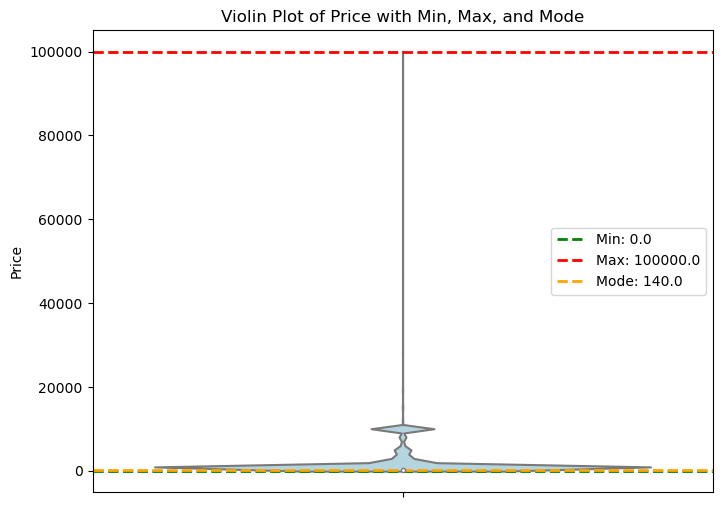

In [18]:
# Calculate the descriptive statistics
price_min = df['price'].min()
price_max = df['price'].max()
price_mode = df['price'].mode()[0]  # Mode might return multiple values, we take the first one for simplicity

print(f"Minimum Price: {price_min}")
print(f"Maximum Price: {price_max}")
print(f"Mode Price: {price_mode}")

plt.figure(figsize=(8, 6))

# Draw the violin plot
sns.violinplot(y=df['price'], color='lightblue')

# Add lines for min, max, and mode
plt.axhline(price_min, color='green', linestyle='dashed', linewidth=2, label=f'Min: {price_min}')
plt.axhline(price_max, color='red', linestyle='dashed', linewidth=2, label=f'Max: {price_max}')
plt.axhline(price_mode, color='orange', linestyle='dashed', linewidth=2, label=f'Mode: {price_mode}')

plt.title('Violin Plot of Price with Min, Max, and Mode')
plt.ylabel('Price')
plt.legend()
plt.show()

In [19]:
#price mode - the value that appears most frequently
price_mode = df['price'].mode()
price_mode

0    140.0
Name: price, dtype: float64

In [20]:
#price range
price_range = df['price'].max() - df['price'].min()
price_range

100000.0

In [22]:
#price variance -  it measures how much the price values in your dataset spread out from the mean price.
price_variance = df['price'].var()
price_variance

717386.7683059764

In [23]:
#price standard deviation
price_std = df['price'].std()
price_std

846.986876112007

In [24]:
#price skewness
price_skew = df['price'].skew()
price_skew

#positively skewed - most of the data points are concentrated on the left, with a few extreme high values (outliers) on the right.
#the price distribution has a significant number of high outliers.

69.36465114745343

In [25]:
#price kurtosis
price_kurt = df['price'].kurt()
price_kurt

# distribution is highly leptokurtic - there are many extreme outliers, both on the low and high ends.

7140.1199901951595

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


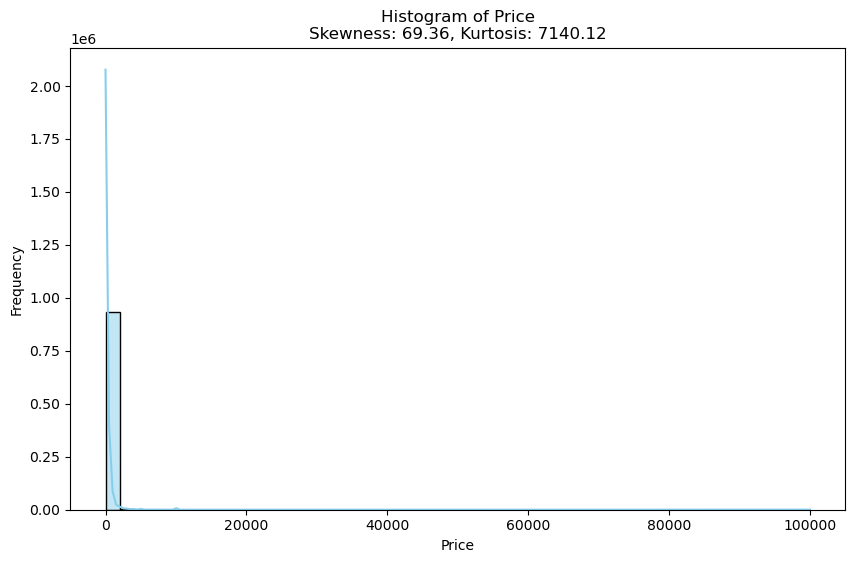

In [26]:
from scipy.stats import norm, kurtosis, skew, probplot

# 1. Histogram with skewness and kurtosis annotations
plt.figure(figsize=(10, 6))
sns.histplot(df['price'].dropna(), kde=True, color='skyblue', bins=50)
plt.title(f'Histogram of Price\nSkewness: {price_skew:.2f}, Kurtosis: {price_kurt:.2f}')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [27]:
# Step 1: Calculate Q1, Q3, and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out the outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(f"Original DataFrame size: {df.shape}")
print(f"DataFrame size after outlier removal: {df_no_outliers.shape}")


Original DataFrame size: (939387, 16)
DataFrame size after outlier removal: (848413, 16)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


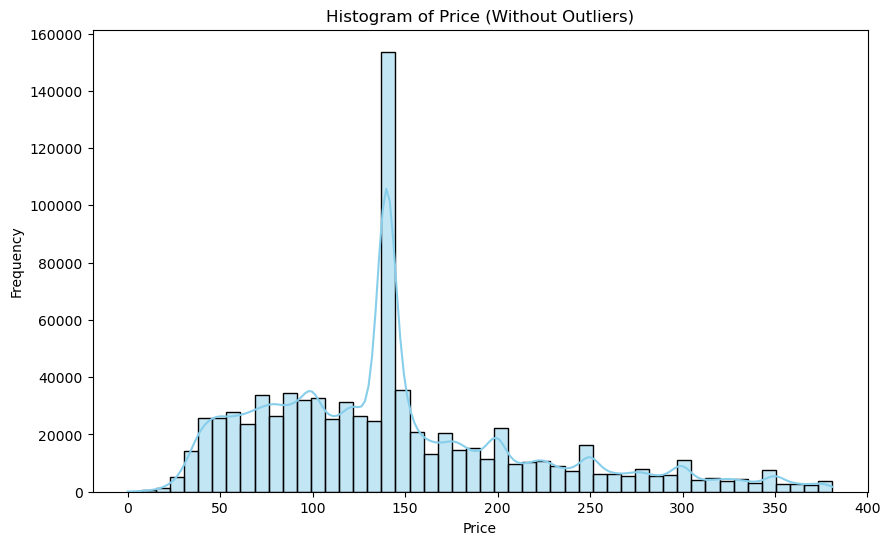

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['price'], kde=True, color='skyblue', bins=50)
plt.title('Histogram of Price (Without Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### Room Type

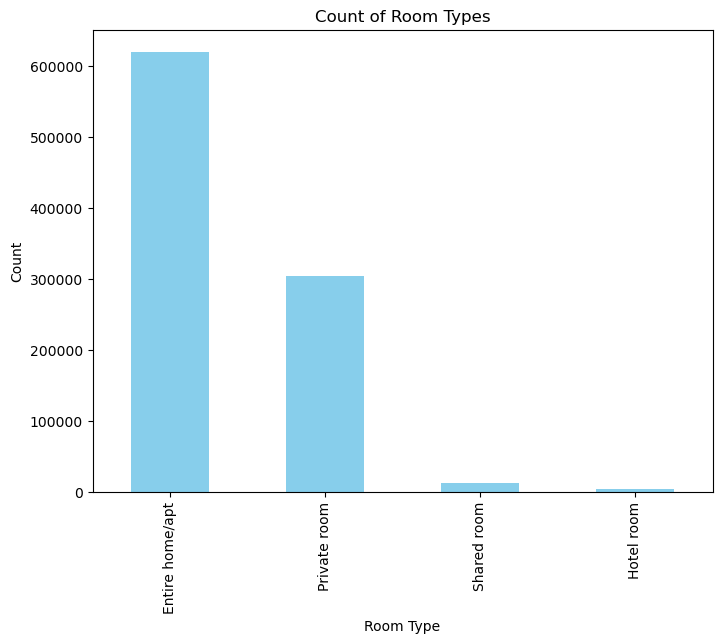

In [29]:
# Bar plot for room_type
plt.figure(figsize=(8, 6))
df['room_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Count of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

#### Number of Reviews

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


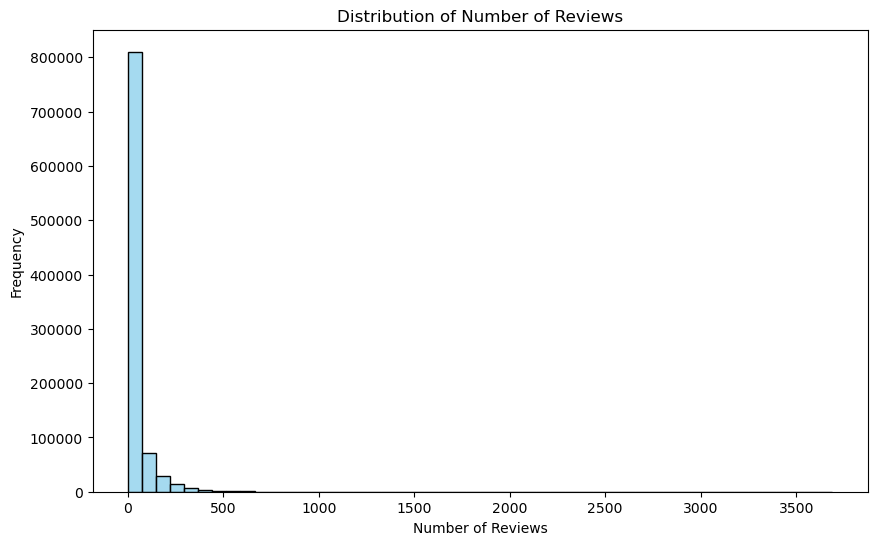

In [30]:
# Histogram of number_of_reviews
plt.figure(figsize=(10, 6))
sns.histplot(df['number_of_reviews'], kde=False, color='skyblue', bins=50)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

In [31]:
df['number_of_reviews'].describe()

count    939387.000000
mean         34.552161
std          74.614357
min           0.000000
25%           0.000000
50%           6.000000
75%          33.000000
max        3689.000000
Name: number_of_reviews, dtype: float64

#### Number of Listings

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


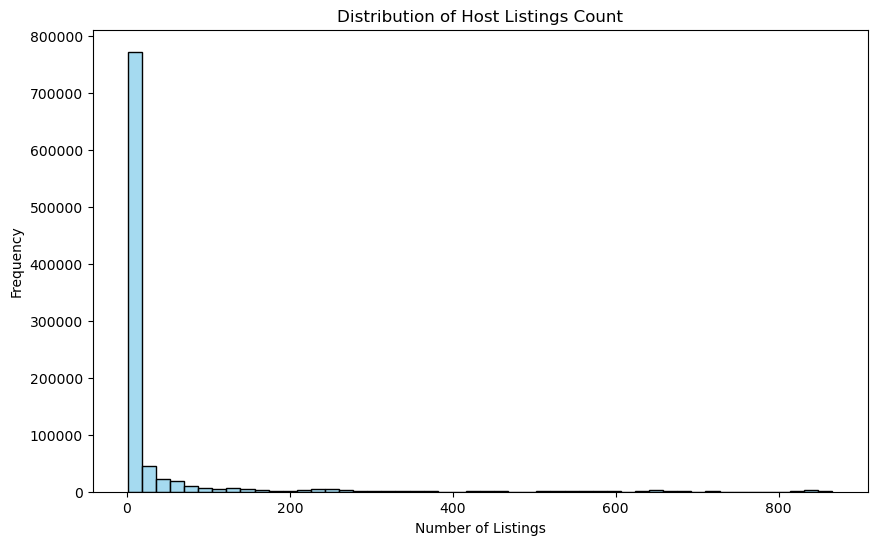

In [32]:
# Histogram of host_listings_count
plt.figure(figsize=(10, 6))
sns.histplot(df['calculated_host_listings_count'], kde=False, color='skyblue', bins=50)
plt.title('Distribution of Host Listings Count')
plt.xlabel('Number of Listings')
plt.ylabel('Frequency')
plt.show()

In [33]:
df['calculated_host_listings_count'].describe()

count    939387.000000
mean         32.876571
std         111.082459
min           1.000000
25%           1.000000
50%           2.000000
75%           9.000000
max         866.000000
Name: calculated_host_listings_count, dtype: float64

#### Availabilty 365

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


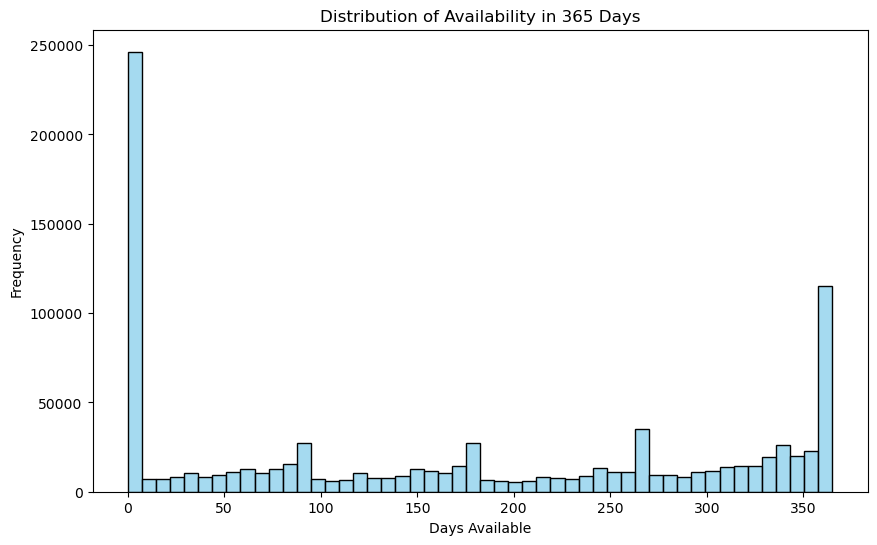

In [34]:
# Histogram of host_listings_count
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_365'], kde=False, color='skyblue', bins=50)
plt.title('Distribution of Availability in 365 Days')
plt.xlabel('Days Available')
plt.ylabel('Frequency')
plt.show()

#### Listings per city & state

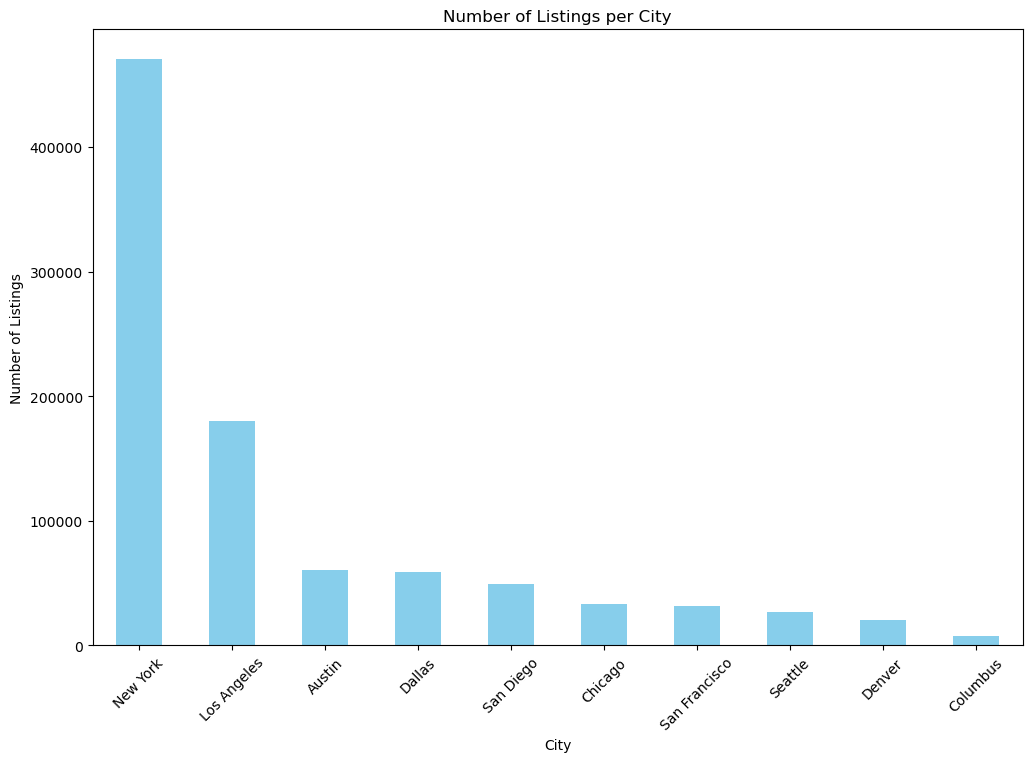

In [35]:
# Bar plot for number of listings per city
plt.figure(figsize=(12, 8))
df['city'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Listings per City')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

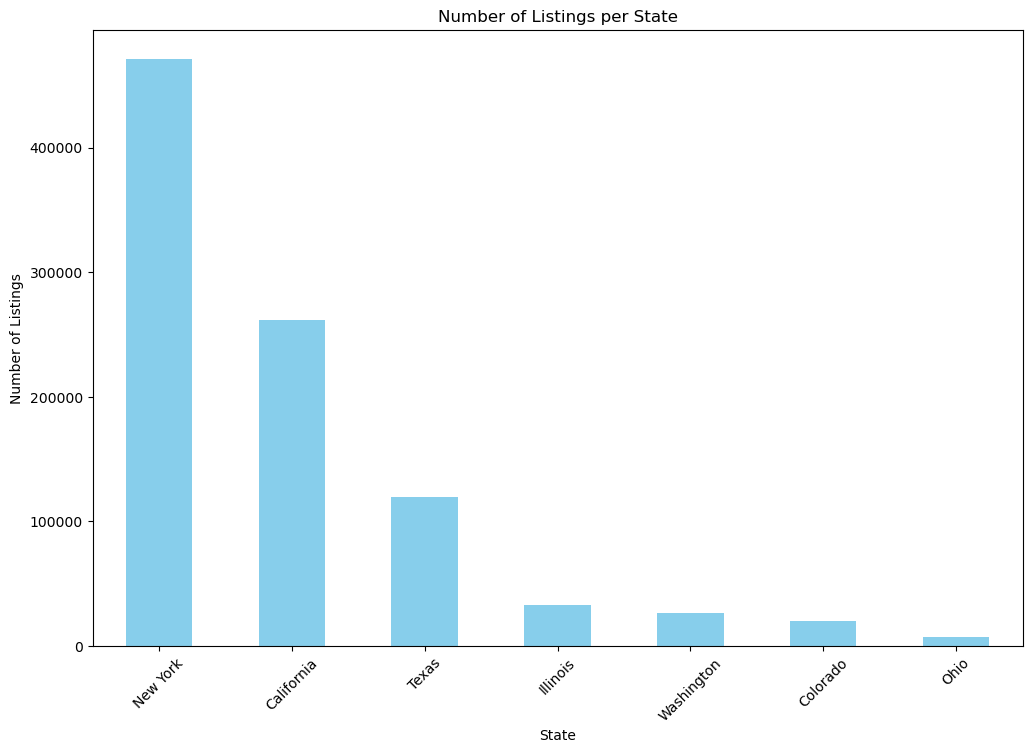

In [36]:
# Bar plot for number of listings per city
plt.figure(figsize=(12, 8))
df['state'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Listings per State')
plt.xlabel('State')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

## Bivariate Analysis

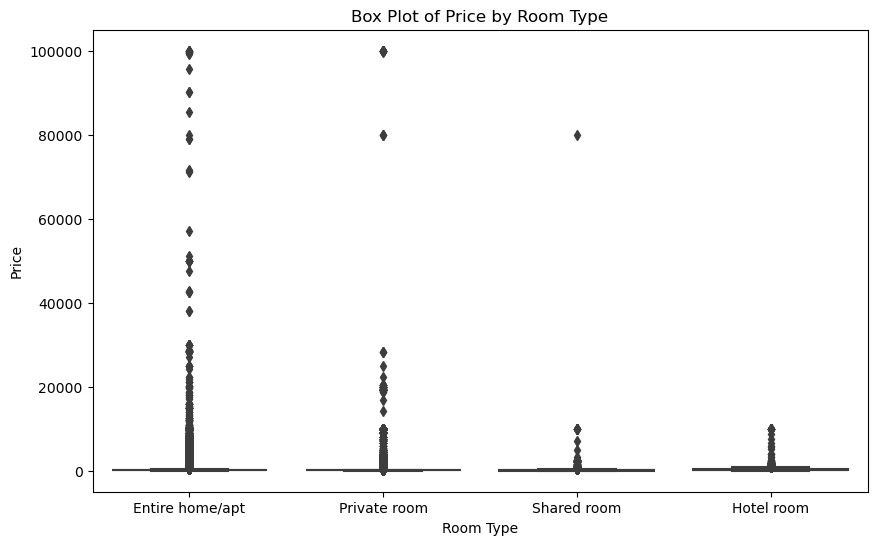

In [37]:
# Box plot of price by room_type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Box Plot of Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

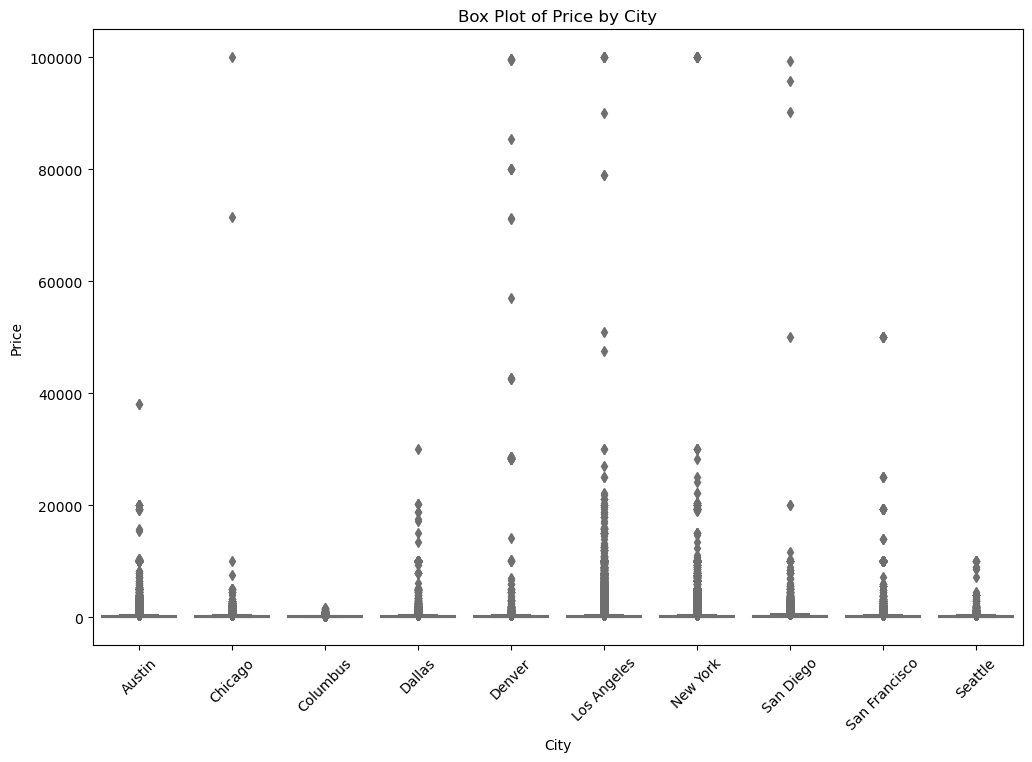

In [38]:
# Box plot of price by city
plt.figure(figsize=(12, 8))
sns.boxplot(x='city', y='price', data=df, palette='pastel')
plt.title('Box Plot of Price by City')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


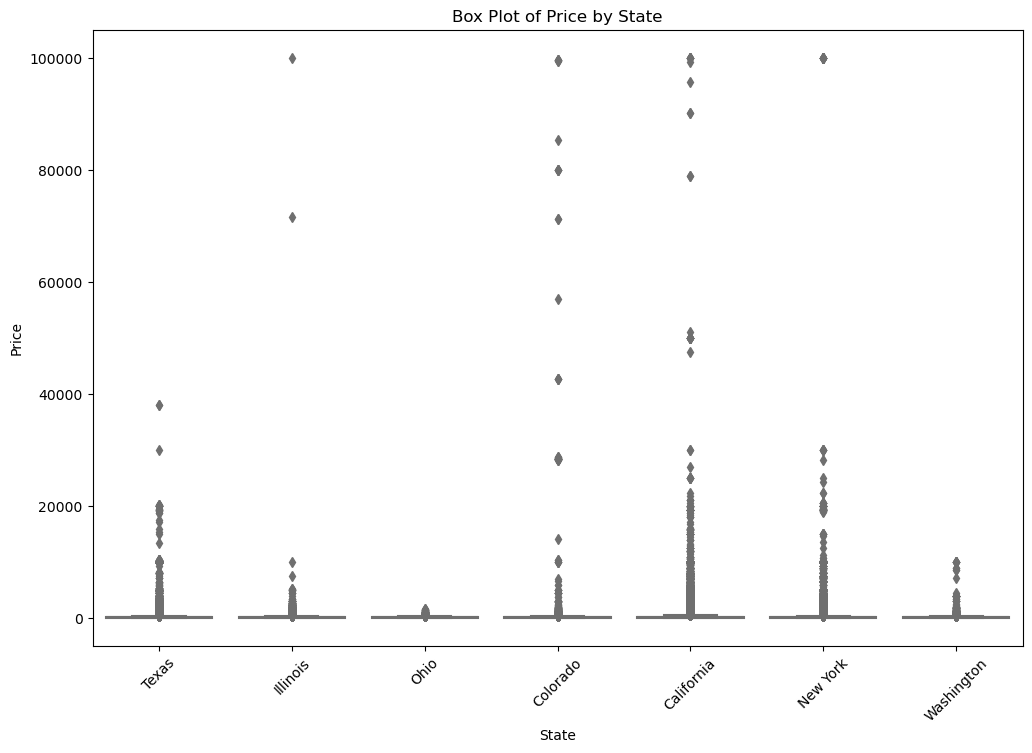

In [39]:
# Box plot of price by state
plt.figure(figsize=(12, 8))
sns.boxplot(x='state', y='price', data=df, palette='pastel')
plt.title('Box Plot of Price by State')
plt.xlabel('State')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [40]:
# Group by 'city' and calculate max, mean, and min price
price_stats_per_city = df.groupby('city')['price'].agg(['max', 'mean', 'min']).reset_index()

# Rename the columns for clarity (optional)
price_stats_per_city.columns = ['City', 'Max Price', 'Mean Price', 'Min Price']

# Display the result
print(price_stats_per_city)

            City  Max Price  Mean Price  Min Price
0         Austin    38143.0  256.469980        1.0
1        Chicago    99998.0  190.161486        7.0
2       Columbus     1673.0  150.639989        9.0
3         Dallas    30000.0  205.911965        9.0
4         Denver    99713.0  277.792206       17.0
5    Los Angeles    99999.0  285.422405        5.0
6       New York   100000.0  197.992383        0.0
7      San Diego    99301.0  300.020200        0.0
8  San Francisco    50000.0  287.941683       10.0
9        Seattle    10000.0  184.967139       10.0


In [41]:
# Group by 'city' and calculate max, mean, and min price
price_stats_per_city_no_outliers = df_no_outliers.groupby('city')['price'].agg(['max', 'mean', 'min']).reset_index()

# Rename the columns for clarity (optional)
price_stats_per_city_no_outliers.columns = ['City', 'Max Price', 'Mean Price', 'Min Price']

# Display the result
print(price_stats_per_city)

            City  Max Price  Mean Price  Min Price
0         Austin    38143.0  256.469980        1.0
1        Chicago    99998.0  190.161486        7.0
2       Columbus     1673.0  150.639989        9.0
3         Dallas    30000.0  205.911965        9.0
4         Denver    99713.0  277.792206       17.0
5    Los Angeles    99999.0  285.422405        5.0
6       New York   100000.0  197.992383        0.0
7      San Diego    99301.0  300.020200        0.0
8  San Francisco    50000.0  287.941683       10.0
9        Seattle    10000.0  184.967139       10.0


<Figure size 1400x800 with 0 Axes>

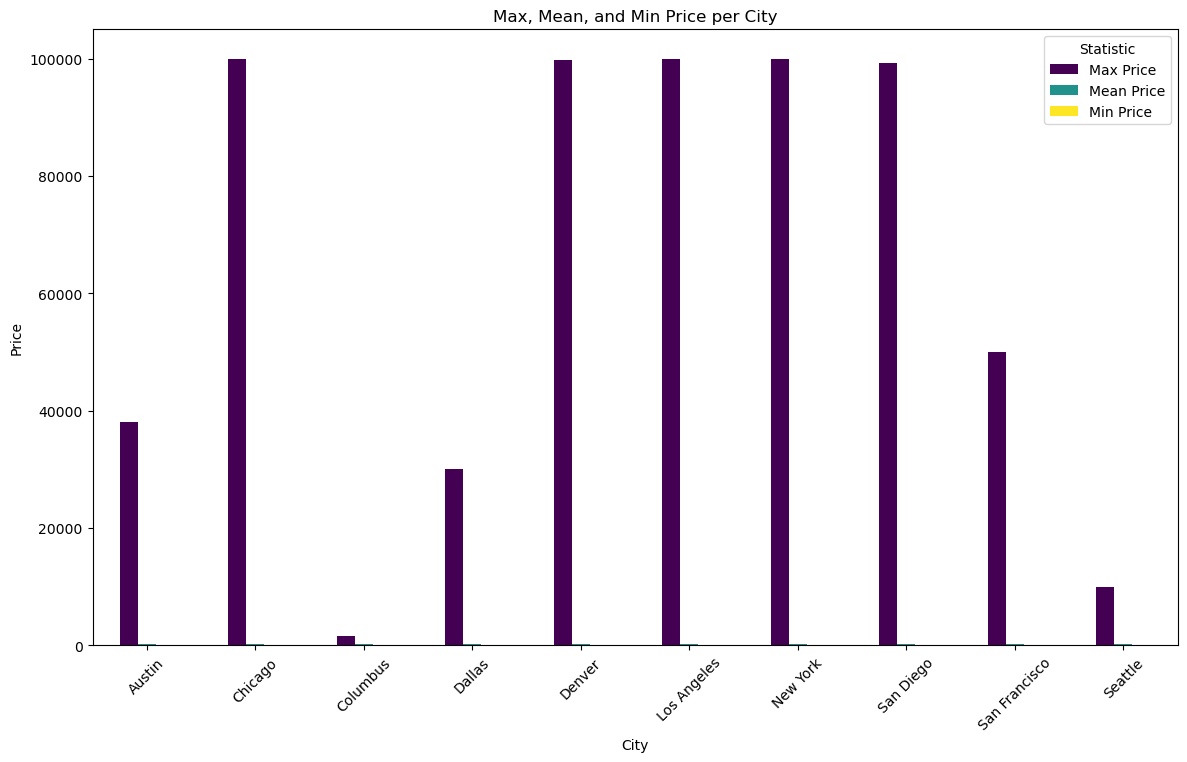

In [42]:
# Set up the plot
plt.figure(figsize=(14, 8))

# Plot max, mean, and min prices
price_stats_per_city.set_index('City').plot(kind='bar', figsize=(14, 8), colormap='viridis')

plt.title('Max, Mean, and Min Price per City')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Statistic')
plt.show()

<Figure size 1400x800 with 0 Axes>

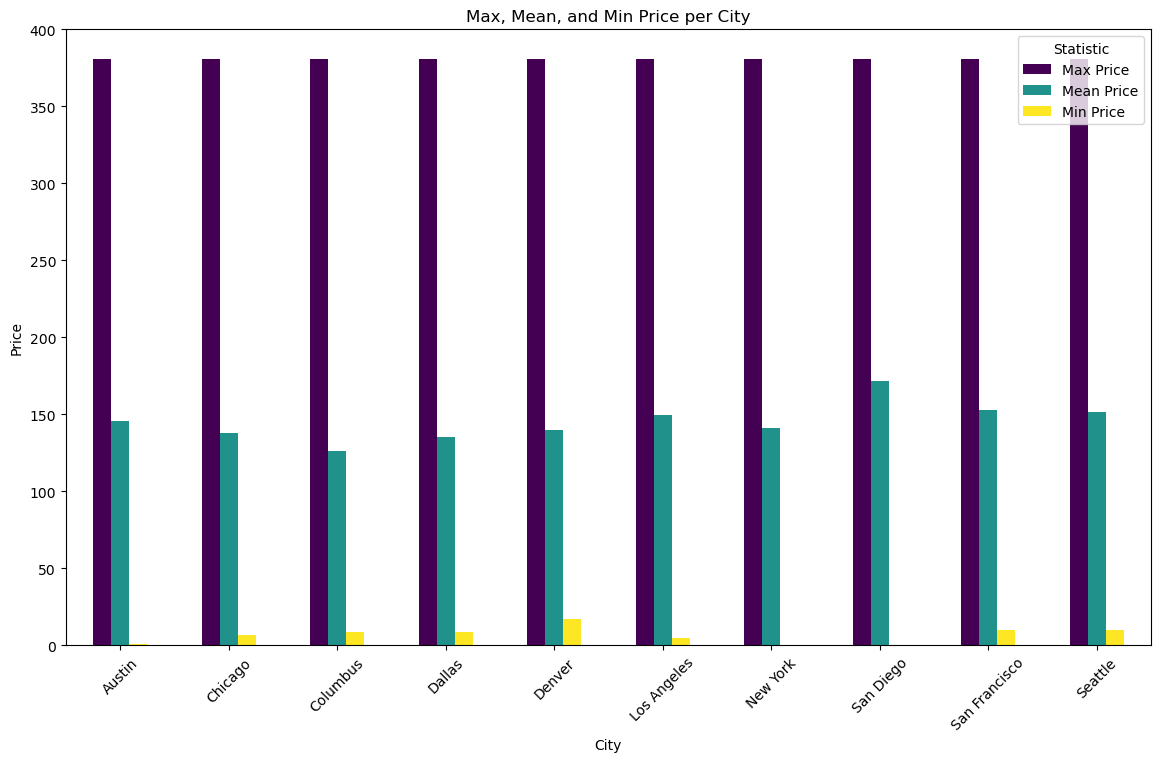

In [43]:
# Set up the plot
plt.figure(figsize=(14, 8))

# Plot max, mean, and min prices
price_stats_per_city_no_outliers.set_index('City').plot(kind='bar', figsize=(14, 8), colormap='viridis')

plt.title('Max, Mean, and Min Price per City')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Statistic')
plt.show()

In [44]:
# Combine year and month into a single column
df['date'] = df['month'] + ' ' + df['year'].astype(str)

# Convert the combined column to a datetime object
df['date'] = pd.to_datetime(df['date'], format='%B %Y')

# Check the first few rows to ensure the conversion worked correctly
print(df.head())

   host_id neighbourhood  latitude  longitude        room_type  price  \
0     8028         78702  30.26057  -97.73441  Entire home/apt  126.0   
1     8186         78729  30.45697  -97.78422     Private room   45.0   
2    13879         78704  30.24885  -97.73587  Entire home/apt   57.0   
3    14156         78704  30.26034  -97.76487  Entire home/apt  159.0   
4    25298         78741  30.23466  -97.73682  Entire home/apt   48.0   

   minimum_nights  number_of_reviews  reviews_per_month  \
0               2                657               3.72   
1               1                290               1.77   
2              30                122               0.73   
3               3                305               2.09   
4               4                 51               0.31   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               306                     42   
1                               1                 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


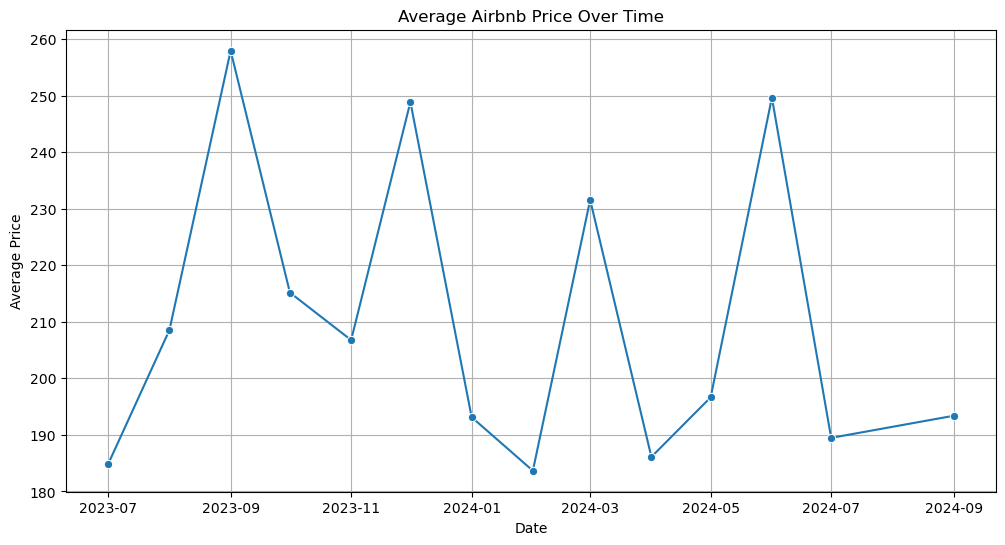

In [45]:
# Group by date and calculate the mean price
df_grouped = df.groupby('date')['price'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='price', data=df_grouped, marker='o')
plt.title('Average Airbnb Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


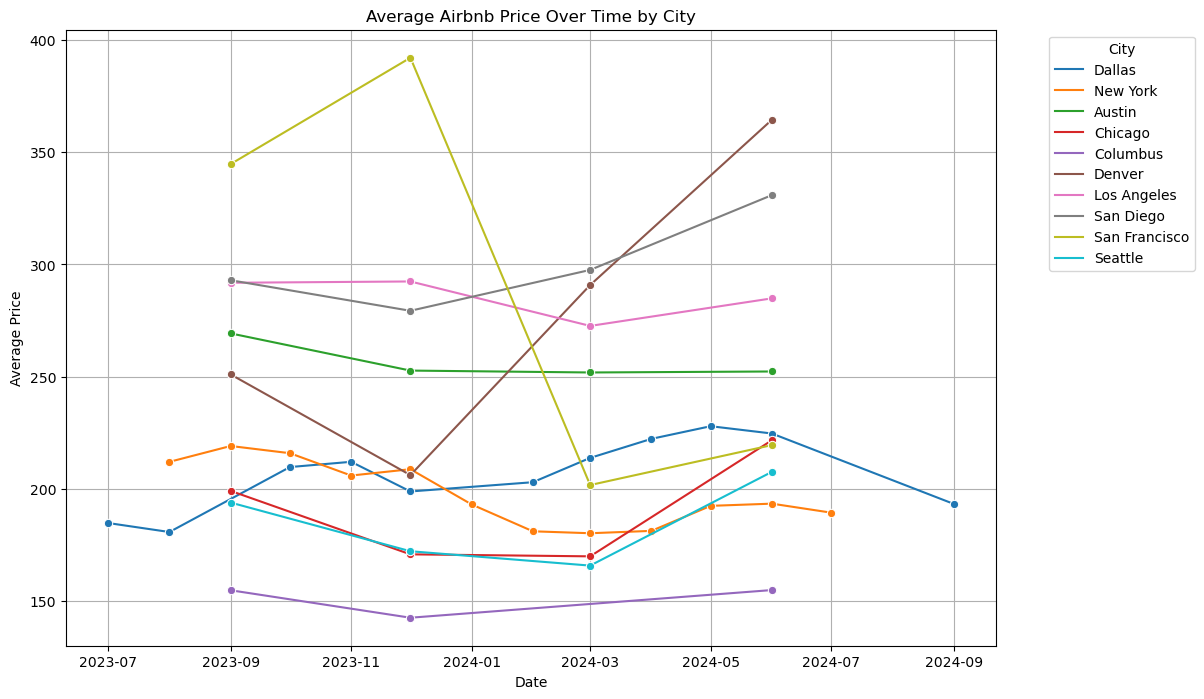

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame with 'date', 'city', and 'price' columns

# Group by date and city to calculate the mean price for each city over time
df_grouped = df.groupby(['date', 'city'])['price'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='date', y='price', hue='city', data=df_grouped, marker='o')

plt.title('Average Airbnb Price Over Time by City')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [44]:
import plotly.express as px

# Specify the city you want to focus on
selected_city = 'Austin'  # Replace with your desired city

# Filter the DataFrame for the selected city
df_city = df[df['city'] == selected_city]

# Add a color column based on price or any other condition
df_city['color'] = df_city['price'].apply(
    lambda x: 'red' if x > 300 else ('orange' if x > 200 else ('yellow' if x > 100 else 'green'))
)
# Create the map for the selected city
fig = px.scatter_mapbox(df_city,
                        lat="latitude",
                        lon="longitude",
                        hover_name="price",
                        hover_data={"city": True, "price": True},
                        color="color",
                        zoom=12,
                        height=600)

# Update layout for Mapbox style
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title=f"Airbnb Listings in {selected_city} with Custom Colors")

# Display the map
fig.show()

/var/folders/vp/y35h7cns1893095_3t9y959w0000gn/T/ipykernel_19775/2023324274.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city['color'] = df_city['price'].apply(


In [45]:
df

host_id  neighbourhood   latitude   longitude        room_type  \
0            8028          78702  30.260570  -97.734410  Entire home/apt   
1            8186          78729  30.456970  -97.784220     Private room   
2           13879          78704  30.248850  -97.735870  Entire home/apt   
3           14156          78704  30.260340  -97.764870  Entire home/apt   
4           25298          78741  30.234660  -97.736820  Entire home/apt   
...           ...            ...        ...         ...              ...   
939382  398317720  Phinney Ridge  47.676760 -122.358820  Entire home/apt   
939383  184675574         Bryant  47.665714 -122.289243     Private room   
939384  584875397        Roxhill  47.531331 -122.374214  Entire home/apt   
939385  581629893  Rainier Beach  47.509680 -122.256950     Private room   
939386  386420269       Belltown  47.614920 -122.347120  Entire home/apt   

        price  minimum_nights  number_of_reviews  reviews_per_month  \
0       126.0               2                657               3.72   
1        45.0               1                290               1.77   
2        57.0              30                122               0.73   
3       159.0               3                305               2.09   
4        48.0               4                 51               0.31   
...       ...             ...                ...                ...   
939382  481.0               1                  0               0.00   
939383   82.0               2                  0               0.00   
939384  222.0               2                  0               0.00   
939385   40.0               1                  0               0.00   
939386  432.0               2                  0               0.00   

        calculated_host_listings_count  availability_365  \
0                                    1               306   
1                                    1                 0   
2                                    1                 0   
3                                    1               156   
4                                    1                98   
...                                ...               ...   
939382                              66               324   
939383                               4                26   
939384                               1               171   
939385                               1               260   
939386                              30               152   

        number_of_reviews_ltm  year      month     city       state       date  
0                          42  2023  September   Austin       Texas 2023-09-01  
1                          21  2023  September   Austin       Texas 2023-09-01  
2                           3  2023  September   Austin       Texas 2023-09-01  
3                          17  2023  September   Austin       Texas 2023-09-01  
4                           3  2023  September   Austin       Texas 2023-09-01  
...                       ...   ...        ...      ...         ...        ...  
939382                      0  2024       June  Seattle  Washington 2024-06-01  
939383                      0  2024       June  Seattle  Washington 2024-06-01  
939384                      0  2024       June  Seattle  Washington 2024-06-01  
939385                      0  2024       June  Seattle  Washington 2024-06-01  
939386                      0  2024       June  Seattle  Washington 2024-06-01  

[939387 rows x 17 columns]

In [48]:
#drop month and year columns
df = df.drop(columns=['month', 'year', 'date'])

In [50]:
#save the cleaned data to a new csv file
df.to_csv('Data/Cleaned_Airbnb_Data.csv', index=False)

In [48]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['room_type', 'neighbourhood', 'city', 'state'], drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to scale
numerical_features = ['latitude', 'longitude', 'minimum_nights', 
                      'reviews_per_month', 'calculated_host_listings_count', 
                      'availability_365', 'number_of_reviews_ltm']

scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])


In [ ]:
# Example of creating a new feature
df_encoded['price_per_night'] = df_encoded['price'] / df_encoded['minimum_nights']


In [ ]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")